# Úloha 2
####    Data o několika stovkách klientů obsahují dva sloupce: pohlaví a věk. Máme hypotézu, že podíl žen mezi klienty se statisticky významně mění s věkem.
####    a) Navrhněte způsob, jak graficky znázornit data tak, abychom si udělali dobrou a korektní představu, zda může hypotéza platit.
####    b) Navrhněte vhodnou statistickou metodu, která by hypotézu na datech ověřila. Můžete uvést i více metod.

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

###    a) Navrhněte způsob, jak graficky znázornit data tak, abychom si udělali dobrou a korektní představu, zda může hypotéza platit.

### Tvorba vlastního datasetu

In [4]:
def generate_dataset():
    
    initial_probability = 0.4  # Initial F/M ratio
    exponential_factor = 1.01
    data = []

    
    for age in range(18, 80):               # one age 18
        sample = random.randint(90, 100)      # sampling random big group of clients 90-100 to add a litle bit of noise 
        for i in range(sample):
            if random.random() < initial_probability:   # initial probability 0,4 = 4 from 10 will be assigned as Female 
                data.append(("F", age))                 
            else:
                data.append(("M", age))
        initial_probability *= exponential_factor                        # once one age run is done, we will modulate probability 
                
    dataset = pd.DataFrame(data)
    

    if not os.path.exists('./data'):
        os.makedirs('./data')
    dataset.columns = ['gender', 'age']
    dataset.to_csv("./data/data.csv", index=False)


generate_dataset()

#### Načtení dat a investigace

In [5]:
# data import  
data = pd.read_csv("./data/data.csv")
data.head()

,gender,age
0,M,18
1,M,18
2,M,18
3,F,18
4,F,18


#### Uložení a Vizualizace datasetu

In [6]:
# 1) Data preprocessing
grouped_data = data.groupby("age").value_counts()
grouped_data_dataframe = pd.DataFrame(grouped_data)
grouped_data_dataframe.to_csv("./data/preprocessed_dataset.csv")

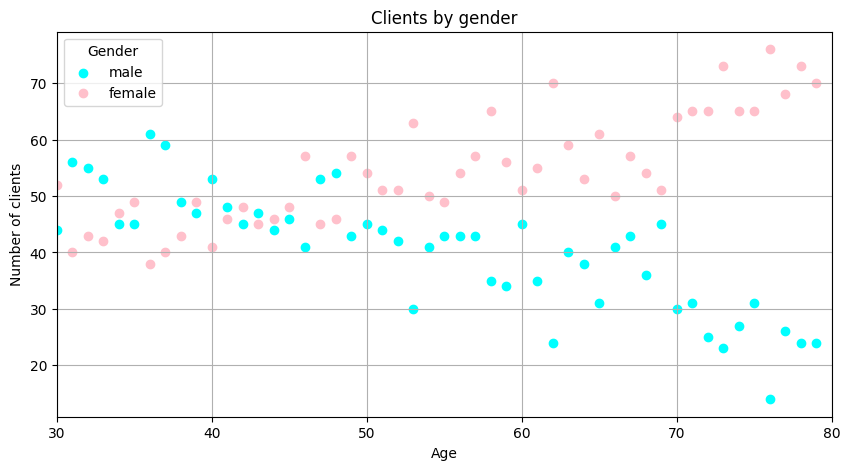

In [7]:
# 2) Data load
data_to_plot = pd.read_csv("./data/preprocessed_dataset.csv")

data_to_plot[data_to_plot["gender"] == "M"]["count"]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x=data_to_plot[data_to_plot["gender"] == "M"]["age"],
           y=data_to_plot[data_to_plot["gender"] == "M"]["count"],
           color="cyan", 
           label="male")
ax.scatter(x=data_to_plot[data_to_plot["gender"] == "F"]["age"],
           y=data_to_plot[data_to_plot["gender"] == "F"]["count"],
           color="pink", 
           label="female")
ax.legend(title="Gender")
ax.set(title="Clients by gender", 
       xlabel="Age",
       ylabel="Number of clients")
ax.grid(True)
ax.set_xlim(30, 80)
plt.show()

### b) Navrhněte vhodnou statistickou metodu, která by hypotézu na datech ověřila. Můžete uvést i více metod.

#### Metoda - Pearson Correlation Coefficient

In [ ]:
# Načtení dat
data = pd.read_csv("./data/preprocessed_dataset.csv")
data['gender'] = data['gender'].replace({'M': 1, 'F': 0})
data

In [64]:
# Datový preprocesing za použití .pivot_table() metody
pivot_data = data.pivot_table(index=["gender"], columns='age', values='count', aggfunc='sum').reset_index()
pivot_data

age,gender,18,19,20,21,22,23,24,25,26,...,70,71,72,73,74,75,76,77,78,79
0,0,43,39,38,46,44,41,37,45,40,...,64,65,65,73,65,65,76,68,73,70
1,1,47,52,58,54,47,54,54,55,58,...,30,31,25,23,27,31,14,26,24,24


In [65]:
import pandas as pd
from scipy import stats

# Rozdělení dat do 2  1D arrays
pivot_data = data.pivot_table(index=["gender"], columns='age', values='count', aggfunc='sum').reset_index()
gender_male = np.array(pivot_data[pivot_data["gender"] == 1])
gender_female = np.array(pivot_data[pivot_data["gender"] == 0])
gender_female = gender_female.flatten()
gender_male = gender_male.flatten()

# Ověření rozměru arrays
print(f"Length of gender_male: {len(gender_male)}")
print(f"Length of gender_female: {len(gender_female)}")


Length of gender_male: 63
Length of gender_female: 63


In [75]:
# Naplnění dat do Pearson korelační funkce
statistic_corelation = stats.pearsonr(gender_male, gender_female)
print(f"Final corelation parameter of the M/F ratio dataset: {statistic_corelation.statistic} with p-value: {statistic_corelation.pvalue}")

Final corelation parameter of the M/F ratio dataset: -0.4745182792762987 with p-value: 8.528805318236764e-05
